IMPORTACION DE MODULOS UTILIZADOS

In [180]:
import pandas as pd
from urllib.request import urlopen
import urllib.request
import requests
import time 
from multiprocessing import Process, Queue, Pool
import threading
import sys
import numpy as np
import re
from datetime import datetime
#from random_user_agent.user_agent import UserAgent
#from random_user_agent.params import SoftwareName, OperatingSystem
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
#from fake_useragent import UserAgent
from selenium.webdriver.chrome.options import Options
import pandasql as ps
from IPython.display import display,HTML
import matplotlib.pyplot as plt

# FUNCION DE LA PAGINA WEB "JUGUETEGA"

In [76]:
def Juguetega_scrapper(juguete):
    
    path ="C:\Windows\chromedriver.exe" # carga del web driver
    driver=webdriver.Chrome(path)
    #driver = webdriver.Chrome(chrome_options=options, executable_path=path)

    url="https://juguetega.com/search?options%5Bprefix%5D=last&q="+juguete
    driver.get(url)
    
    time.sleep(5)
    
    juguetes=driver.find_elements_by_class_name("clearfix")
    
    time.sleep(5)
    
    list_urls=[]
    for i in range(0,len(juguetes)):
    #print(i)
        try:
            if juguetes[i].find_element_by_tag_name("a").get_attribute("href") != 'https://juguetega.com/collections/sin-rebajas':
                list_urls.append(juguetes[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            list_urls.append(np.nan)
        
    list_urls = [i for i in list_urls if str(i) != "nan"]   
    
    list_nombres = []
    for i in range(1,len(juguetes)):
        try:
            list_nombres.append(juguetes[i].find_element_by_tag_name("a").get_attribute("title"))
        except:
            list_nombres.append(np.nan)
    #print(len(list_nombres)) 
    #print(len(list_nombres)) 
    #list_nombres
    
    time.sleep(10)
    
    ahora = datetime.now()
    fecha = ahora.strftime("%d/%m/%Y")
    list_fecha = []
    for i in range(len(juguetes)-1):
        list_fecha.append(fecha)
    
    list_precio =[]
    for i in range(1,len(juguetes)):
        try:
            try:
                list_precio.append(juguetes[i].find_elements(By.TAG_NAME, "del")[0].text.replace(",","").replace("$","").replace("'","").replace("'",""))
            except:
                list_precio.append(juguetes[i].find_elements(By.CLASS_NAME, "price-money")[0].text.replace(",","").replace("$","").replace("'","").replace("'",""))
        except:
            list_precio.append(0)
    
    time.sleep(10)
    
    list_precio_prom = []
    for i in range(1,len(juguetes)):
        try:
            list_precio_prom.append(juguetes[i].find_element(By.CLASS_NAME, "price-money").text.replace("$","").replace("'","").replace("'",""))
        except:
            list_precio_prom.append(0)
    
    time.sleep(10)
    
    
    df_juguetega=pd.DataFrame(columns=["FECHA","JUGUETE", "AUTOSERVICIO","NOMBRE","PRECIO","PRECIO_PROMOCION"])
    df_juguetega["FECHA"] = list_fecha
    df_juguetega["AUTOSERVICIO"] = "Juguetega"
    df_juguetega["NOMBRE"] = list_nombres
    df_juguetega["PRECIO"] = list_precio
    df_juguetega["JUGUETE"] = juguete
    df_juguetega["PRECIO_PROMOCION"] = list_precio_prom
    time.sleep(3)
    
    driver.quit()
    
    return df_juguetega

# FUNCION DE LA PAGINA WEB "JUGUETIBICI"

In [77]:
def Juguetibici_scrapper(juguete):
    
    path ="C:\Windows\chromedriver.exe" # carga del web driver
    driver=webdriver.Chrome(path)
    #driver = webdriver.Chrome(chrome_options=options, executable_path=path)

    url="https://juguetibici.com/search?q="+juguete+"&type=product"
    driver.get(url)
    
    time.sleep(5)
    
    juguetes=driver.find_elements_by_class_name("grid__item.large--one-third.medium--one-third")
    
    time.sleep(5)
    
    list_urls=[]
    for i in range(0,len(juguetes)):
    #print(i)
        try:
            list_urls.append(juguetes[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            list_urls.append(np.nan)
    time.sleep(5)

    list_urls = [i for i in list_urls if str(i) != "nan"]    
    
    list_nombres = []
    for i in range(0,len(juguetes)):
        try:
            list_nombres.append(juguetes[i].find_element_by_class_name("product-name").text)
        except:
            list_nombres.append(np.nan)
    #print(len(list_nombres)) 
    #list_nombres
    
    time.sleep(10)
    
    ahora = datetime.now()
    fecha = ahora.strftime("%d/%m/%Y")
    list_fecha = []
    for i in juguetes:
        list_fecha.append(fecha)
    
    list_precio =[]
    for j in list_urls:
        driver.get(j)
        time.sleep(8)
        try:
            try:
                list_precio.append(driver.find_elements(By.CLASS_NAME, "product-compare-price")[0].text.replace("$","").replace("'","").replace("'","").replace(",",""))
            except:
                list_precio.append(driver.find_elements(By.CLASS_NAME, "price")[0].text.replace("$","").replace("'","").replace("'","").replace(",",""))
        except:
            list_precio.append(0)
    
    time.sleep(10)
    
    list_precio_prom = []
    for j in list_urls:
        driver.get(j)
        time.sleep(8)
        try:
            try:
                list_precio_prom.append(driver.find_element(By.CLASS_NAME, "product-price.on-sale").text.replace("$","").replace("'","").replace("'","").replace(",",""))
            except:     
                list_precio_prom.append(driver.find_elements(By.CLASS_NAME, "price")[0].text.replace("$","").replace("'","").replace("'","").replace(",",""))
        except:
            list_precio_prom.append(0)
    
    time.sleep(10)
    
    
    df_juguetibici=pd.DataFrame(columns=["FECHA","JUGUETE", "AUTOSERVICIO","NOMBRE","PRECIO","PRECIO_PROMOCION"])
    df_juguetibici["FECHA"] = list_fecha
    df_juguetibici["AUTOSERVICIO"] = "Juguetibici"
    df_juguetibici["NOMBRE"] = list_nombres
    df_juguetibici["PRECIO"] = list_precio
    df_juguetibici["JUGUETE"] = juguete
    df_juguetibici["PRECIO_PROMOCION"] = list_precio_prom
    time.sleep(3)
    
    driver.quit()
    
    return df_juguetibici

# FUNCION DE LA PAGINA WEB "JULIO CEPEDA JUGUETERIA"

In [78]:
def JulioJuguetes_scrapper(juguete):
    
    path ="C:\Windows\chromedriver.exe" # carga del web driver
    driver=webdriver.Chrome(path)
    #driver = webdriver.Chrome(chrome_options=options, executable_path=path)

    url="https://juliocepeda.com/catalogsearch/result/?q=" + juguete
    driver.get(url)
    
    time.sleep(5)
    
    juguetes=driver.find_elements_by_class_name("product-item-info.type4")
    
    time.sleep(5)
    
    list_urls=[]
    for i in range(0,len(juguetes)):
    #print(i)
        try:
            list_urls.append(juguetes[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            list_urls.append(np.nan)
    time.sleep(5)

    list_urls = [i for i in list_urls if str(i) != "nan"]    
    
    list_nombres = []
    for i in range(0,len(juguetes)):
        try:
            list_nombres.append(juguetes[i].find_element_by_class_name("product.name.product-item-name").text)
        except:
            list_nombres.append(np.nan)
    #print(len(list_nombres)) 
    #list_nombres
    
    time.sleep(10)
    
    ahora = datetime.now()
    fecha = ahora.strftime("%d/%m/%Y")
    list_fecha = []
    for i in juguetes:
        list_fecha.append(fecha)
    
    list_precio=[]
    for i in range(0,len(juguetes)):    
        try:
            list_precio.append(juguetes[i].find_element_by_class_name("price").text.replace("$","").replace("'","").replace("'","").replace(",",""))
        except:
            list_precio.append(0)   
    
    time.sleep(10)
    
    list_precio_prom=[]

    for i in range(0,len(juguetes)):    
        try:
            try:
                list_precio_prom.append(juguetes[i].find_element_by_class_name("special-price").text.replace("$","").replace("'","").replace("'","").replace("Precio", "").replace(",","").replace("\n",""))
            except:
                list_precio_prom.append(juguetes[i].find_element_by_class_name("price").text.replace("$","").replace("'","").replace(",","").replace("'",""))
        except:
            list_precio_prom.append(0)
    
    time.sleep(10)
    
    
    df_jugueteria=pd.DataFrame(columns=["FECHA","JUGUETE", "AUTOSERVICIO","NOMBRE","PRECIO","PRECIO_PROMOCION"])
    df_jugueteria["FECHA"] = list_fecha
    df_jugueteria["AUTOSERVICIO"] = "Julio Cepeda Jugueteria"
    df_jugueteria["NOMBRE"] = list_nombres
    df_jugueteria["PRECIO"] = list_precio
    df_jugueteria["JUGUETE"] = juguete
    df_jugueteria["PRECIO_PROMOCION"] = list_precio_prom
    time.sleep(3)
    
    driver.quit()
    
    return df_jugueteria

MANDAMOS A LLAMAR A LAS FUNCIONES DE CADA PAGINA POR PRODUCTO

In [79]:
df_jugueteria_1 = JulioJuguetes_scrapper("Barbie")

In [80]:
df_jugueteria_2 = JulioJuguetes_scrapper("Lego")

In [81]:
df_jugueteria_3 = JulioJuguetes_scrapper("Carro")

In [95]:
df_juguetega_1 = Juguetega_scrapper("Barbie")

In [96]:
df_juguetega_2 = Juguetega_scrapper("Lego")

In [97]:
df_juguetega_3 = Juguetega_scrapper("Carro")

In [82]:
df_juguetibici_1 = Juguetibici_scrapper("Barbie")

In [98]:
df_juguetibici_2 = Juguetibici_scrapper("Lego")

In [99]:
df_juguetibici_3 = Juguetibici_scrapper("Carro")

CONCATEMANOS LOS DATAFRAME POR JUGUETE PARA PODER REALIZAR UNA FILTRACION DE DATOS POSTERIORMENTE

In [109]:
df_barbie = pd.concat([df_jugueteria_1,df_juguetibici_1, df_juguetega_1], ignore_index=True)

In [111]:
df_barbie.NOMBRE=df_barbie.NOMBRE.str.upper()

In [112]:
df_barbie = df_barbie[df_barbie.NOMBRE.str.contains("BARBIE")]

In [113]:
df_lego = pd.concat([df_jugueteria_2, df_juguetibici_2, df_juguetega_2],ignore_index=True )

In [114]:
df_lego.NOMBRE=df_lego.NOMBRE.str.upper()

In [115]:
df_lego = df_lego[df_lego.NOMBRE.str.contains("LEGO")]

In [116]:
df_carro = pd.concat([df_jugueteria_3, df_juguetibici_3,  df_juguetega_3], ignore_index=True)

In [117]:
df_carro.NOMBRE=df_carro .NOMBRE.str.upper()

In [118]:
df_carro = df_carro[df_carro.NOMBRE.str.contains("CARRO")]

CONCATENAMOS TODAS LOS DATAFRAME EN UNO SOLO

In [119]:
df_toydata = pd.concat([df_barbie, df_lego, df_carro],ignore_index=True )

VISUALIZAMOS Y OPTIMIZAMOS EL DATAFRAME PARA CONVERTIR LOS DATOS DE PRECIOS A FLOAT

In [120]:
df_toydata

,FECHA,JUGUETE,AUTOSERVICIO,NOMBRE,PRECIO,PRECIO_PROMOCION
0,16/12/2022,Barbie,Julio Cepeda Jugueteria,BARBIE DHA BROOKLYN,265.00,265.00
1,16/12/2022,Barbie,Juguetibici,BARBIE FASHIONISTAS 179 FBR37,335.00,335.00
2,16/12/2022,Barbie,Juguetibici,BUNDLE BARBIE DIA DE MUERTOS 2022 (BARBIE & KEN),3399.00,3399.00
3,16/12/2022,Barbie,Juguetibici,NUEVA BARBIE CASA MALIBU HCD50,2799.00,1679.40
4,16/12/2022,Barbie,Juguetibici,BARBIE FOOD TRUCK GMW07,1419.00,1419.00
...,...,...,...,...,...,...
141,16/12/2022,Carro,Julio Cepeda Jugueteria,CARRO CON BASTON AZUL STEP 2,2769.00,2769.00
142,16/12/2022,Carro,Julio Cepeda Jugueteria,SPIDEY AND HIS AMAZING FRIENDS SURTIDO CARRO A...,435.00,435.00
143,16/12/2022,Carro,Julio Cepeda Jugueteria,CARRO CRUISER ROJO CON ASA DESPLEGABLE,2780.00,2780.00
144,16/12/2022,Carro,Julio Cepeda Jugueteria,SUPER PAQUETE DE 5 CARROS HOT WHEELS,199.00,199.00


In [121]:
df_toydata.shape

(146, 6)

In [122]:
df_toydata.dtypes

FECHA               object
JUGUETE             object
AUTOSERVICIO        object
NOMBRE              object
PRECIO              object
PRECIO_PROMOCION    object
dtype: object

In [126]:
df_toydata["PRECIO"] = df_toydata["PRECIO"].astype(float)
df_toydata["PRECIO_PROMOCION"] =df_toydata["PRECIO_PROMOCION"].str.replace(",","")
df_toydata["PRECIO_PROMOCION"] = df_toydata["PRECIO_PROMOCION"].astype(float)

In [127]:
df_toydata.dtypes

FECHA                object
JUGUETE              object
AUTOSERVICIO         object
NOMBRE               object
PRECIO              float64
PRECIO_PROMOCION    float64
dtype: object

EXPORTAMOS EL DATAFRAME A UN ARCHIVO CSV

In [128]:
df_toydata.to_csv('Toydata.csv')

IMPORTAMOS EL DATAFRAME DESDE EL ARCHIVO CSV PARA REALIZAR CONSULTAS

In [129]:
df_toydata = pd.read_csv('Toydata.csv')

In [130]:
df_toydata

,Unnamed: 0,FECHA,JUGUETE,AUTOSERVICIO,NOMBRE,PRECIO,PRECIO_PROMOCION
0,0,16/12/2022,Barbie,Julio Cepeda Jugueteria,BARBIE DHA BROOKLYN,265.0,265.0
1,1,16/12/2022,Barbie,Juguetibici,BARBIE FASHIONISTAS 179 FBR37,335.0,335.0
2,2,16/12/2022,Barbie,Juguetibici,BUNDLE BARBIE DIA DE MUERTOS 2022 (BARBIE & KEN),3399.0,3399.0
3,3,16/12/2022,Barbie,Juguetibici,NUEVA BARBIE CASA MALIBU HCD50,2799.0,1679.4
4,4,16/12/2022,Barbie,Juguetibici,BARBIE FOOD TRUCK GMW07,1419.0,1419.0
...,...,...,...,...,...,...,...
141,141,16/12/2022,Carro,Julio Cepeda Jugueteria,CARRO CON BASTON AZUL STEP 2,2769.0,2769.0
142,142,16/12/2022,Carro,Julio Cepeda Jugueteria,SPIDEY AND HIS AMAZING FRIENDS SURTIDO CARRO A...,435.0,435.0
143,143,16/12/2022,Carro,Julio Cepeda Jugueteria,CARRO CRUISER ROJO CON ASA DESPLEGABLE,2780.0,2780.0
144,144,16/12/2022,Carro,Julio Cepeda Jugueteria,SUPER PAQUETE DE 5 CARROS HOT WHEELS,199.0,199.0


CONSULTAS

In [134]:
ps.sqldf("select AUTOSERVICIO,avg(PRECIO) from df_toydata group by AUTOSERVICIO")

,AUTOSERVICIO,avg(PRECIO)
0,Juguetega,683.800000
1,Juguetibici,1303.000000
2,Julio Cepeda Jugueteria,1875.654206


In [137]:
ps.sqldf("select * from df_toydata where PRECIO_PROMOCION < PRECIO")

,Unnamed: 0,FECHA,JUGUETE,AUTOSERVICIO,NOMBRE,PRECIO,PRECIO_PROMOCION
0,3,16/12/2022,Barbie,Juguetibici,NUEVA BARBIE CASA MALIBU HCD50,2799.0,1679.4
1,9,16/12/2022,Barbie,Juguetibici,BARBIE NUEVA CASA DE LOS SUEÑOS 2021 GRG93,4999.0,2999.4
2,132,16/12/2022,Lego,Juguetibici,LEGO® MARVEL: LOS ETERNOS: A LA SOMBRA DE ARIS...,1579.0,789.5


In [141]:
ps.sqldf("select * FROM df_toydata where JUGUETE = 'Barbie' order by PRECIO")

,Unnamed: 0,FECHA,JUGUETE,AUTOSERVICIO,NOMBRE,PRECIO,PRECIO_PROMOCION
0,25,16/12/2022,Barbie,Juguetega,BARBIE GLITZ SURTIDO,180.0,180.0
1,0,16/12/2022,Barbie,Julio Cepeda Jugueteria,BARBIE DHA BROOKLYN,265.0,265.0
2,13,16/12/2022,Barbie,Juguetega,BARBIE HADA,265.0,265.0
3,22,16/12/2022,Barbie,Juguetega,BARBIE SIRENA 2,265.0,265.0
4,11,16/12/2022,Barbie,Juguetibici,BARBIE PRINCESA - AZUL GJK12,279.0,279.0
5,1,16/12/2022,Barbie,Juguetibici,BARBIE FASHIONISTAS 179 FBR37,335.0,335.0
6,5,16/12/2022,Barbie,Juguetibici,BARBIE FASHIONISTAS 171 GRB62,345.0,345.0
7,27,16/12/2022,Barbie,Juguetega,BARBIE LOVES THE OCEAN,346.0,346.0
8,8,16/12/2022,Barbie,Juguetibici,BARBIE MOVIMIENTOS SIN LÍMITES GXF05,425.0,425.0
9,6,16/12/2022,Barbie,Juguetibici,BARBIE SANTA CLAUS RUBIA HJG72,435.0,435.0


In [148]:
ps.sqldf("select AUTOSERVICIO, NOMBRE, PRECIO from df_toydata where JUGUETE != 'Carro' and PRECIO < 1000 order by PRECIO")

,AUTOSERVICIO,NOMBRE,PRECIO
0,Juguetega,BARBIE GLITZ SURTIDO,180.0
1,Julio Cepeda Jugueteria,LEGO CITY HELICÓPTERO DE POLICÍA,219.0
2,Julio Cepeda Jugueteria,LEGO CLASSIC BASE AZUL 11025,229.0
3,Juguetega,LEGO MARVEL: ASALTO AEREO DE LOS ETERNOS,249.0
4,Julio Cepeda Jugueteria,LEGO SUPER HEROES LABORATORIO DE SHURI,259.0
...,...,...,...
57,Julio Cepeda Jugueteria,LEGO STAR WARS ATAQUE DE LOS SOLDADOS,899.0
58,Julio Cepeda Jugueteria,LEGO MINECRAFT EL RANCHO-CONEJO,899.0
59,Julio Cepeda Jugueteria,LEGO MARVEL SPIDER-MAN EN EL LABORATORIO 10783,939.0
60,Julio Cepeda Jugueteria,LEGO MINECRAFT EL BASTIÓN DEL NETHER 21185,999.0


In [170]:
ps.sqldf("select AUTOSERVICIO, JUGUETE, NOMBRE, max(PRECIO) as MAX_PRECIO from df_toydata group by AUTOSERVICIO")

,AUTOSERVICIO,JUGUETE,NOMBRE,MAX_PRECIO
0,Juguetega,Barbie,CAMPER DE BARBIE 3 EN 1,2708.0
1,Juguetibici,Barbie,BARBIE NUEVA CASA DE LOS SUEÑOS 2021 GRG93,4999.0
2,Julio Cepeda Jugueteria,Lego,LEGO MARVEL DAILY BUGLE 76178,8699.0


In [171]:
ps.sqldf("select AUTOSERVICIO, JUGUETE, NOMBRE, min(PRECIO) as MIN_PRECIO from df_toydata group by AUTOSERVICIO")

,AUTOSERVICIO,JUGUETE,NOMBRE,MIN_PRECIO
0,Juguetega,Barbie,BARBIE GLITZ SURTIDO,180.0
1,Juguetibici,Carro,HOT WHEELS PAQUETE DE 5 CARROS 1806,215.0
2,Julio Cepeda Jugueteria,Carro,SUPER PAQUETE DE 5 CARROS HOT WHEELS,199.0


In [176]:
ps.sqldf("select * from df_toydata where PRECIO > 500 order by PRECIO desc")

,Unnamed: 0,FECHA,JUGUETE,AUTOSERVICIO,NOMBRE,PRECIO,PRECIO_PROMOCION
0,91,16/12/2022,Lego,Julio Cepeda Jugueteria,LEGO MARVEL DAILY BUGLE 76178,8699.0,8699.0
1,104,16/12/2022,Lego,Julio Cepeda Jugueteria,LEGO CAMP NOU FC BARCELONA,8499.0,8499.0
2,89,16/12/2022,Lego,Julio Cepeda Jugueteria,LEGO SUPER MARIO NINTENDO ENTERTAINMENT SYSTEM,6499.0,6499.0
3,52,16/12/2022,Lego,Julio Cepeda Jugueteria,LEGO STAR WARS SPEEDER TERRESTRE DE LUKE SKYWA...,5799.0,5799.0
4,9,16/12/2022,Barbie,Juguetibici,BARBIE NUEVA CASA DE LOS SUEÑOS 2021 GRG93,4999.0,2999.4
...,...,...,...,...,...,...,...
115,105,16/12/2022,Lego,Julio Cepeda Jugueteria,LEGO DUPLO GUARDERÍA DE DINOSAURIOS 10938,529.0,529.0
116,109,16/12/2022,Lego,Julio Cepeda Jugueteria,LEGO JURASSIC WORLD PERSECUCIÓN EN MOTO DEL DI...,529.0,529.0
117,110,16/12/2022,Lego,Julio Cepeda Jugueteria,LEGO JURASSIC WORLD CAZA DEL PTERANODON 76943,529.0,529.0
118,26,16/12/2022,Barbie,Juguetega,BARBIE SET DE MAESTRA DE ARTE RUBIA CON ALUMNA,521.0,521.0


In [178]:
ps.sqldf("select JUGUETE, sum(PRECIO) as SUM_PRECIO from df_toydata group by JUGUETE")

,JUGUETE,SUM_PRECIO
0,Barbie,29795.0
1,Carro,20271.0
2,Lego,189062.0


<AxesSubplot:ylabel='Frequency'>

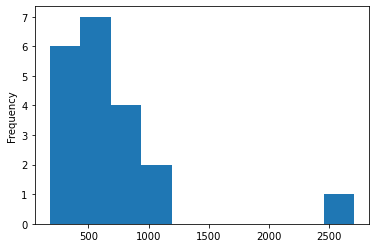

In [195]:
df_toydata[df_toydata.AUTOSERVICIO=="Juguetega"]["PRECIO"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

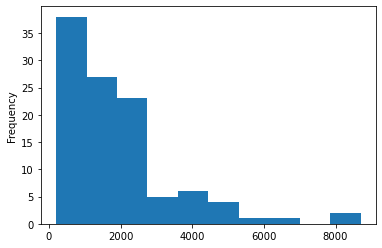

In [192]:
df_toydata[df_toydata.AUTOSERVICIO=="Julio Cepeda Jugueteria"]["PRECIO"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

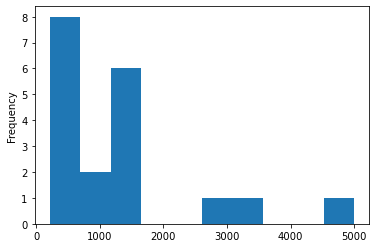

In [198]:
df_toydata[df_toydata.AUTOSERVICIO=="Juguetibici"]["PRECIO"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

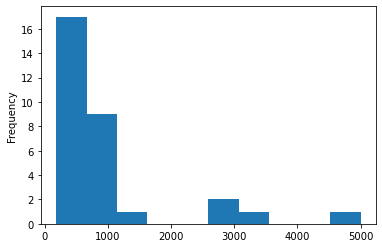

In [199]:
df_toydata[df_toydata.JUGUETE=="Barbie"]["PRECIO"].plot.hist()